In [ ]:
# Data exploration
n = 9
X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Number of points
num_points = X.shape[0]
print("Number of data points:", num_points)

# Number of features (dimensions)
num_features = X.shape[1]
print("Number of features (dimensions):", num_features)

# Unique classes and their counts
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Classes and their counts:", dict(zip(unique_classes, class_counts)))

Shape of X: (18000, 9)
Shape of y: (18000,)
Number of data points: 18000
Number of features (dimensions): 9
Classes and their counts: {np.int64(0): np.int64(8964), np.int64(1): np.int64(9036)}


In [15]:
# Class distribution
import numpy as np

# Load target variable
n = 9
y = np.load('Datasets/kryptonite-%s-y.npy' % n)

# Check class distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique_classes, class_counts))
print("Class distribution:", class_distribution)

Class distribution: {np.int64(0): np.int64(8964), np.int64(1): np.int64(9036)}


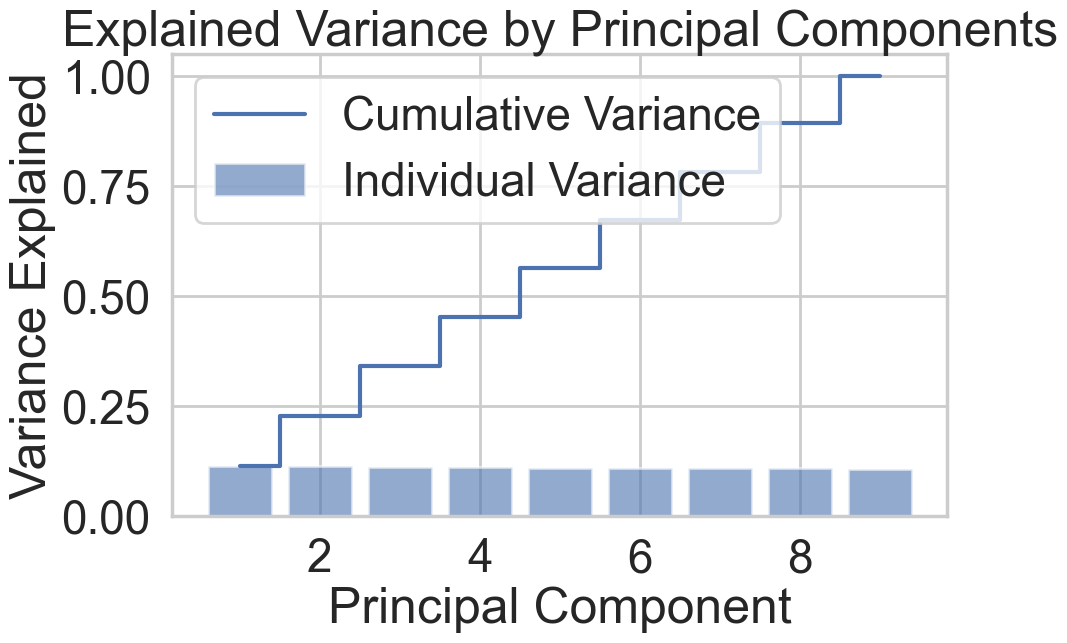

Principal Component 1: 0.1147 variance explained
Principal Component 2: 0.1136 variance explained
Principal Component 3: 0.1128 variance explained
Principal Component 4: 0.1121 variance explained
Principal Component 5: 0.1106 variance explained
Principal Component 6: 0.1103 variance explained
Principal Component 7: 0.1098 variance explained
Principal Component 8: 0.1092 variance explained
Principal Component 9: 0.1070 variance explained


In [22]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
n = 9
X = np.load('Datasets/kryptonite-%s-X.npy' % n)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.show()

# Print explained variance for each component
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f} variance explained")

In [2]:
n_values = [9,12,15]

p_values = [1,2,3,4,5,6,7]

presolved_acc_by_n = [[0.5033918128654971, 0.516140350877193, 0.5139181286549708, 0.5250292397660818, 0.5383625730994152, 0.5638596491228071, 0.5913450292397661], 
                      [0.5016666666666667, 0.496875, 0.5058333333333334, 0.5108333333333334, 0.51375, 0.5241666666666667, 0.5333333333333333],
                     [0.49773333333333336, 0.5005333333333334, 0.504, 0.4978666666666667, 0.5038666666666667, 0.5157333333333334, 0.5241666666666667]]

presolved_feat_by_n = [[10, 55, 220, 715, 2002, 5005, 11440], 
                       [13, 91, 455, 1820, 6188, 18564, 50388],
                       [16, 136, 816, 3876, 15504, 54264, 170544]]


In [8]:
# Regularisation
def run_poly_logistic_regression_with_l2_reg(n, e):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

    # Create polynomial features (set degree as desired)
    degree = e
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    print(X_train_poly.shape)
    features = X_train_poly.shape[-1]
    print("Created features")

    # Initialize and fit logistic regression
    logreg = LogisticRegression(penalty="l2", max_iter=500, solver='sag', C=0.85)
    logreg.fit(X_train_poly, y_train)
    print("Fit Model")

    # Evaluate on the validation set
    y_val_pred = logreg.predict(X_val_poly)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    y_test_pred = logreg.predict(X_test_poly)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_accuracy, features

In [10]:
acc, feat = run_poly_logistic_regression_with_l2_reg(9, 3)
print(acc)

(7200, 220)
Created features
Fit Model
Validation Accuracy: 0.5050
Test Accuracy: 0.5193
0.5192592592592593


# Gradient Boosting Machine

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
import pandas as pd

def run_gbm_with_normalization(n):
    # Load data
    X = np.load('Datasets/kryptonite-%s-X.npy' % (n))
    y = np.load('Datasets/kryptonite-%s-y.npy' % (n))

    # Normalize the data
    norm = preprocessing.Normalizer().fit(X)
    X = norm.transform(X)
    X = np.asarray(X)

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

    # Initialize the GBM model with specific hyperparameters
    gbm = GradientBoostingClassifier(
        n_estimators=100,          # Number of trees
        learning_rate=0.05,        # Learning rate
        max_depth=5,               # Maximum depth of each tree
        min_samples_split=5,       # Minimum number of samples required to split an internal node
        min_samples_leaf=3,        # Minimum number of samples required to be at a leaf node
        subsample=0.8,             # Fraction of samples used per tree
        random_state=42
    )

    # Fit the model on the training set
    gbm.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = gbm.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Evaluate the model on the test set
    y_test_pred = gbm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    return test_accuracy

In [2]:
gbm_accuracy = run_gbm_with_normalization(9)
print(f"Accuracy for Kryptonite-9: {gbm_accuracy}")

Validation Accuracy: 0.7246
Test Accuracy: 0.7304
Accuracy for Kryptonite-9: 0.7303703703703703


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

def run_gbm(n):
    # Load data
    X = np.load('Datasets/kryptonite-%s-X.npy' % (n))
    y = np.load('Datasets/kryptonite-%s-y.npy' % (n))

    # Normalize the data
    norm = preprocessing.Normalizer().fit(X)
    X = norm.transform(X)
    X = np.asarray(X)

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

    # Define the parameter grid
    param_grid = {
        'n_estimators': [300,400,500],        # Number of trees
        'learning_rate': [0.05, 0.1],     # Learning rate
        'max_depth': [3, 5],                 # Maximum depth of each tree
        'min_samples_split': [5, 10],        # Minimum number of samples required to split an internal node
        'min_samples_leaf': [3, 5],          # Minimum number of samples required to be at a leaf node
        'subsample': [0.8]                 # Fraction of samples used per tree
    }

    # Initialize the GBM model
    gbm = GradientBoostingClassifier(random_state=42)

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=gbm,
        param_grid=param_grid,
        scoring='accuracy',       # Use accuracy as the evaluation metric
        cv=5,                     # 5-fold cross-validation
        verbose=2,                # Print progress messages
        n_jobs=-1                 # Use all available cores
    )

    # Fit GridSearchCV on the training set
    grid_search.fit(X_train, y_train)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {best_params}")

    # Evaluate the best model on the validation set
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy with Best Parameters: {val_accuracy:.4f}")

    # Evaluate the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")

    # Optional: Display all results of the grid search
    results_df = pd.DataFrame(grid_search.cv_results_)
    print("\nGrid Search Results:")
    print(results_df[['mean_test_score', 'std_test_score', 'params']])
    
    return best_params, test_accuracy

In [17]:
gbm_accuracy = run_gbm(9)
print(f"Accuracy for Kryptonite-9: {gbm_accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 500, 'subsample': 0.8}
Validation Accuracy with Best Parameters: 0.8120
Test Accuracy with Best Parameters: 0.8059

Grid Search Results:
    mean_test_score  std_test_score  \
0          0.652500        0.014610   
1          0.659861        0.014695   
2          0.667500        0.010077   
3          0.652361        0.009426   
4          0.660556        0.010019   
5          0.667778        0.009240   
6          0.648194        0.010031   
7          0.660972        0.009080   
8          0.663889        0.008926   
9          0.648194        0.010031   
10         0.660972        0.009080   
11         0.663889        0.008926   
12         0.776389        0.017678   
13         0.789028        0.011540   
14         0.790694        0.010583   
15         0.771806        0.018413   
16         0.786389

In [18]:
gbm_accuracy = run_gbm(12)
print(f"Accuracy for Kryptonite-12: {gbm_accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.8}
Validation Accuracy with Best Parameters: 0.5356
Test Accuracy with Best Parameters: 0.5347

Grid Search Results:
    mean_test_score  std_test_score  \
0          0.519687        0.010101   
1          0.515937        0.006341   
2          0.515313        0.005843   
3          0.521458        0.008586   
4          0.519479        0.009482   
5          0.519167        0.014861   
6          0.518750        0.005472   
7          0.520417        0.012073   
8          0.516771        0.009360   
9          0.518750        0.005472   
10         0.520417        0.012073   
11         0.516771        0.009360   
12         0.531146        0.011006   
13         0.532604        0.008656   
14         0.531771        0.004141   
15         0.528021        0.011250   
16         0.52687

In [13]:
gbm_accuracy = run_gbm(15)
print(f"Accuracy for Kryptonite-15: {gbm_accuracy}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}
Validation Accuracy with Best Parameters: 0.4979
Test Accuracy with Best Parameters: 0.4988

Grid Search Results:
    mean_test_score  std_test_score  \
0          0.506000        0.012373   
1          0.507167        0.008738   
2          0.506500        0.014560   
3          0.499583        0.008296   
4          0.503583        0.009282   
..              ...             ...   
59         0.496250        0.004282   
60         0.497833        0.007779   
61         0.498500        0.009460   
62         0.503333        0.008229   
63         0.496250        0.004282   

                                               params  
0   {'learning_rate': 0.05, 'max_depth': 3, 'min_s...  
1   {'learning_rate': 0.05, 'max_depth': 3, 'min_s...  
2   {'learning_rate': 0.05, 'max_depth': 3, 

In [28]:
# try xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
def run_xgboost(n):

    X = np.load('Datasets/kryptonite-%s-X.npy'%(n))
    y = np.load('Datasets/kryptonite-%s-y.npy'%(n))

    # Normalize the data
    norm = preprocessing.Normalizer().fit(X)
    X = norm.transform(X)
    X = np.asarray(X)

    # Shuffle and split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)  # 60% training
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% validation, 20% test

    param_grid = {
        'n_estimators': [900,1200,2000,3000],
        'learning_rate': [0.01],
        'max_depth': [7,10],
        'min_child_weight': [1],
        'subsample': [0.7, 1],
        'colsample_bytree': [0.7, 1],
        'gamma': [0]
    }

    xgb = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')

    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=5,               # 5-fold cross-validation
        scoring='accuracy', # Evaluate performance with accuracy
        verbose=2,          # Increase verbosity for detailed output
        n_jobs=-1           # Use all available cores
    )


    grid_search.fit(X_train, y_train)
    print("Model training complete.")
    #table for all the results
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df = results_df[['mean_test_score', 'std_test_score', 'params']]
    results_df = results_df.sort_values(by='mean_test_score', ascending=False)

    # Get the best parameters and estimator from grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best parameters found: {best_params}")

    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy with best parameters: {val_accuracy:.4f}")

    # Test the best model on the test set
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy with best parameters: {test_accuracy:.4f}")
    print("Grid Search Results (sorted by mean test score):")
    print(results_df)
    return best_params, test_accuracy

In [26]:
xgb_accuracy = run_xgboost(9)
print(f"XGB Accuracy for Kryptonite-9: {xgb_accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:36:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training complete.
Best parameters found: {'colsample_bytree': 1, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 1200, 'subsample': 0.7}
Validation Accuracy with best parameters: 0.8585
Test Accuracy with best parameters: 0.8504
Grid Search Results (sorted by mean test score):
    mean_test_score  std_test_score  \
44         0.840139        0.009048   
46         0.840139        0.005850   
32         0.839167        0.010565   
34         0.837917        0.010674   
42         0.837361        0.010931   
30         0.837222        0.011399   
35         0.824306        0.012932   
28         0.822917        0.009491   
40         0.820972        0.009165   
26         0.820139        0.010092   
38         0.817639        0.010334   
33         0.816667        0.011842   
24         0.816389        0.013427   
36         0.813889        0.012955   
31         0.813472        0.014950   
29         0.809167        0.017565   
11     

In [29]:
xgb_accuracy = run_xgboost(12)
print(f"XGB Accuracy for Kryptonite-12: {xgb_accuracy}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:54:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training complete.
Best parameters found: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 2000, 'subsample': 0.7}
Validation Accuracy with best parameters: 0.5942
Test Accuracy with best parameters: 0.5913
Grid Search Results (sorted by mean test score):
    mean_test_score  std_test_score  \
28         0.582396        0.004133   
30         0.579896        0.005673   
26         0.579687        0.005017   
24         0.576042        0.005219   
14         0.562083        0.006365   
12         0.561458        0.005342   
20         0.561458        0.012130   
22         0.559063        0.008005   
18         0.558437        0.010256   
8          0.556979        0.005577   
10         0.556979        0.009168   
31         0.555312        0.003569   
29         0.555208        0.006276   
15         0.554479        0.006418   
27         0.553021        0.007114   
25         0.552813        0.005235   
16       

In [30]:
xgb_accuracy = run_xgboost(15)
print(f"XGB Accuracy for Kryptonite-15: {xgb_accuracy}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\Sebastian\Downloads\Kryptonite-N-main\Kryptonite-N-main\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:04:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training complete.
Best parameters found: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 2000, 'subsample': 0.7}
Validation Accuracy with best parameters: 0.5037
Test Accuracy with best parameters: 0.5069
Grid Search Results (sorted by mean test score):
    mean_test_score  std_test_score  \
28         0.508500        0.003860   
31         0.508417        0.004137   
8          0.508333        0.007919   
30         0.507250        0.003255   
29         0.506500        0.004508   
19         0.505500        0.003178   
14         0.504750        0.005705   
20         0.504417        0.005569   
10         0.504250        0.006349   
22         0.504000        0.007358   
26         0.503833        0.004170   
23         0.503667        0.006616   
24         0.503333        0.005171   
17         0.502917        0.005503   
12         0.502917        0.007037   
4          0.502917        0.007963   
21       